# **Despliegue del modelo de Recomendacion**

Creamos un Endpoint, donde cualquier aplicación puede consumir el output de nuestro modelo de recomendación, la intención es que el modelo sea entrenado a diario con datos de usuarios que vean nuevo contenido en la plataforma, y a partir de un horario específico sea actualizada la base de datos, la cual tomaría una pequeña API que dispone de nuestro endpoint, donde la aplicaciones de una plataforma de películas puedan consultar las distintas recomendaciones, únicamente con el id del usuario. Esta API fue desarrollada en node.js y desplegada en un servidor web llamado heroku. A continuación, una captura de pantalla del código:

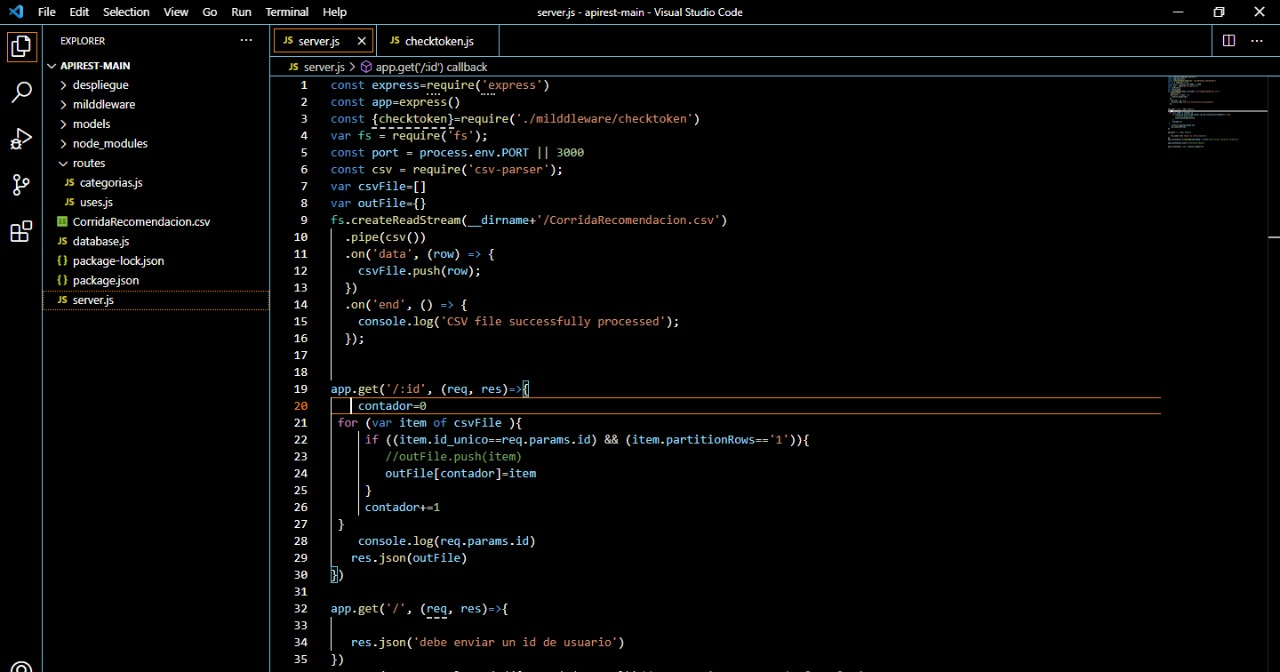

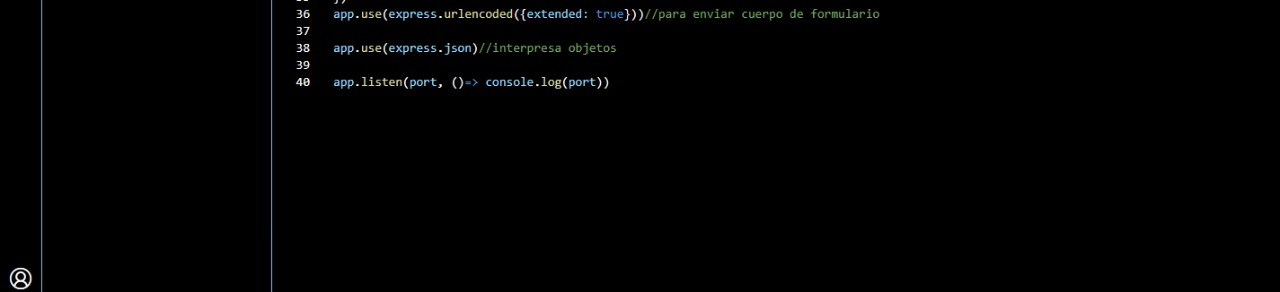

primero, levantemos los id de usuarios que necesitamos para consultar en el endpoint 

In [ ]:
import pandas as pd
import json
from google.colab import drive
drive.mount('/content/drive')
import requests
test=pd.read_csv('/content/drive/MyDrive/Data Science - TP4/datos Proyecto/CorridaRecomendacion.csv')
vistasReales=pd.read_csv('/content/drive/MyDrive/Data Science - TP4/2. Datos Originales/train.csv')
activos=pd.read_csv('/content/drive/MyDrive/Data Science - TP4/datos Proyecto/metadata.csv',sep=";")
#nos quedamos solo con las columnas que nos interezan de los activos
activos=activos.drop_duplicates(subset=['asset_id','content_id'])[['asset_id','content_id','audience','category','country_of_origin','released_year','show_type','title']]


Mounted at /content/drive


In [ ]:
vistasRealesTest=vistasReales[pd.to_datetime(vistasReales.tunein).dt.month==3]
vistasReales=vistasReales[pd.to_datetime(vistasReales.tunein).dt.month!=3]
vistasReales.asset_id=vistasReales.asset_id.fillna(0).astype(int)
vistasRealesTest.asset_id=vistasRealesTest.asset_id.fillna(0).astype(int)
vistasReales['id_unico']=vistasReales.customer_id.astype(str)+vistasReales.account_id.astype(str)
vistasRealesTest['id_unico']=vistasRealesTest.customer_id.astype(str)+vistasRealesTest.account_id.astype(str)


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


Listamos los id únicos, que serían nuestros id de usuarios para consultarle al endpoint qué contenidos le podemos recomendar, como usamos un servidor web gratuito tenemos limitaciones con recursos, por este motivo solo desplegamos recomendaciones para cierta cantidad aleatoria de usuarios. a continuación los disponibles a consultar.

In [ ]:
test.id_unico.unique()

array([ 3928558678,  3048051100,  4474663663,  1727789545,  6050378386,
        7040188819, 10761322372,   224927790, 84237104248,  6490583109,
       89302110625,  6573983981,  5811676026,  6157679604, 88094109188,
        5221370550,  1290887736,  6000577928,  7696595837, 10229518424,
        2716148201,  4303562096,  7718896070,   418397566,  4593564760,
       82848104643,    16651998, 63505101948,  4098360213,   478729811,
        5800275915, 87075107786,   119624816,  2793448839,  5641374441,
        8040599743,  9975416429, 10971924009,  3062051210, 82037101667,
        1540038272, 10037716923,  3459454633,  4903967618,  7665595487,
        5071669166,  5277771080, 87817108791,  5043168925,  3024750901,
        6398282069, 10231318438,   392329128,  6559283829, 85825106187,
        2800848896,  7050588932,  1059402535,   500029987, 87519108421,
       89906111372,  9871815628,  7701495891,  6466782800,  1506438001,
        9921016019,  5623674254,  7296891468,  7615395001,  3481


> hacemos el request al endpoint con cualquiera de los usuarios de arriba, a los cuales tenemos recomendaciones para mostrarles.
 



In [ ]:
idUsuarioAconsultar='7001088420'

In [ ]:
respsuesta=requests.get("https://recomendacion-equipo-3-dh.herokuapp.com/"+idUsuarioAconsultar)

In [ ]:
respsuesta

<Response [200]>

cargamos en un json la respuesta 

In [ ]:

recomendaciones = json.loads(respsuesta.text)

visualizamos las recomendaciones que consumiria la aplicacion, con esto, llevaria finalmente el contenido recomendado a los usuarios finales

In [ ]:
recomendaciones

{'118182': {'': '118182',
  'asset_id': '18948',
  'audience': 'Juvenil',
  'category': 'Entretenimiento',
  'content_id': '420',
  'country_of_origin': 'AR',
  'episodioNumero': '1',
  'id_unico': '7001088420',
  'ordenRecomendacion': '118182',
  'partitionRows': '1',
  'released_year': '2020.0',
  'run_time_min': '37.0',
  'show_type': 'Gaming',
  'temporadaNumero': '1',
  'title': 'T:1 Ep:01 Manijomio: Fantastic Flow'},
 '119740': {'': '119740',
  'asset_id': '27026',
  'audience': 'General',
  'category': 'Acción/Fantasía',
  'content_id': '454',
  'country_of_origin': 'US',
  'episodioNumero': '0',
  'id_unico': '7001088420',
  'ordenRecomendacion': '119740',
  'partitionRows': '1',
  'released_year': '2015.0',
  'run_time_min': '106.0',
  'show_type': 'Película',
  'temporadaNumero': '0',
  'title': 'El último cazador de brujas'},
 '120384': {'': '120384',
  'asset_id': '23788',
  'audience': 'Juvenil',
  'category': 'Entretenimiento',
  'content_id': '479',
  'country_of_origin'

In [ ]:
#armamos DF para visualizar mejor las recomendaciones 
recomendacionesDF=pd.DataFrame()
for i in recomendaciones:
  recomendacionesDF=recomendacionesDF.append(pd.DataFrame({
      'asset_id': recomendaciones[i]['asset_id'],
      'content_id': recomendaciones[i]['content_id'],
      'audience': recomendaciones[i]['audience'],
      'category': recomendaciones[i]['category'],
      'country_of_origin':recomendaciones[i]['country_of_origin'],
      'released_year':recomendaciones[i]['released_year'],
      'show_type':recomendaciones[i]['show_type'],
       'title':recomendaciones[i]['title']  
  }, index=[0]),ignore_index=True)

In [ ]:
#componemos lo que el usuario realmente vio, tanto en el set de train como en test, ordenado en la hora en que realmente lo vio
vistaRealUser=vistasReales[vistasReales.id_unico==idUsuarioAconsultar].sort_values('tunein')[['asset_id']]
vistasRealesUserTest=vistasRealesTest[vistasRealesTest.id_unico==idUsuarioAconsultar].sort_values('tunein')[['asset_id']]

In [ ]:
vistaRealUser=vistaRealUser.merge(activos,on=['asset_id']).drop_duplicates()
vistasRealesUserTest=vistasRealesUserTest.merge(activos,on=['asset_id']).drop_duplicates()


In [ ]:
vistaRealUser.show_type.value_counts()

Película    6
Serie       2
Name: show_type, dtype: int64

Lo que el usuario vio realmente en el set de train

In [ ]:
vistaRealUser



,asset_id,content_id,audience,category,country_of_origin,released_year,show_type,title
0,30357,2040.0,Mujeres,Drama/Comedia,US,2020.0,Serie,T:5 Ep:05 This is Us
1,27751,2241.0,General,Entretenimiento/Música,GB,2015.0,Película,Backstreet Boys: In a World Like this Live in ...
2,639,534.0,Juvenil,Entretenimiento/Música,GB,2019.0,Película,Billie Eilish - Glastonbury Festival
3,25053,368.0,General,Entretenimiento/Música,US,2012.0,Película,Metallica - Orion Festival
4,30284,339.0,Juvenil,Entretenimiento/Música,GB,2017.0,Película,Dua Lipa - Glastonbury
6,30965,542.0,Juvenil,Entretenimiento/Música,GB,2019.0,Película,The Killers - Glastonbury Festival
7,30084,364.0,Juvenil,Entretenimiento/Música,GB,2013.0,Película,Lady Gaga - Itunes Festival
8,10259,2040.0,Mujeres,Drama/Comedia,US,2020.0,Serie,T:5 Ep:07 This is Us


Lo que al usuario le recomendo el algoritmo y termino viendolo

In [ ]:

recomendacionesDF.sample(10)



,asset_id,content_id,audience,category,country_of_origin,released_year,show_type,title
61,23540,718,Teens,Infantil/Dibujos Animados,US,2012.0,TV,T:1 Ep:09 Gravity Falls: Un verano de misterios
34,21526,379,Juvenil,Comedia/Ciencia Ficción,AR,2019.0,Web,T:1 Ep:01 El sueño del pibe
64,17398,951,Niños,Infantil/Dibujos Animados,US,2020.0,TV,T:2 Ep:220 Lego Ninjago
55,7759,662,General,Entretenimiento/Cocina,AR,2020.0,TV,11/19 - Cucinare
52,29788,641,Preescolar,Infantil/Dibujos Animados,AR,2019.0,TV,T:2 Ep:21 Nivis: Amigos de otro mundo
13,26840,114,Mujeres,Comedia/Romance,ES,2018.0,Rolling,T:1 Ep:08 Pequeñas coincidencias
66,18774,1018,Mujeres,Drama,TR,2017.0,TV,Ep:099 Fuerza de mujer
77,23984,1409,Mujeres,Reality/Moda,AR,2021.0,TV,02/26 - Corte y Confección Famosos
91,21926,3353,Mujeres,Drama/Romance,BR,2013.0,Serie,T:1 Ep:76 Rastros de mentiras
88,24727,2040,Mujeres,Drama/Comedia,US,2020.0,Serie,T:5 Ep:10 This is Us


Lo que el usuario vio realmente en el set de test

In [ ]:
vistasRealesUserTest.head(20)



,asset_id,content_id,audience,category,country_of_origin,released_year,show_type,title
0,30084,364.0,Juvenil,Entretenimiento/Música,GB,2013.0,Película,Lady Gaga - Itunes Festival
1,16133,2040.0,Mujeres,Drama/Comedia,US,2020.0,Serie,T:5 Ep:09 This is Us
2,31374,1225.0,General,Drama/Suspenso,US,2001.0,Película,Pecado original
